In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
data=pd.read_csv('C:/Users/CVR/Downloads/archive (1)/GlobalLandTemperaturesByCity.csv')

In [25]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


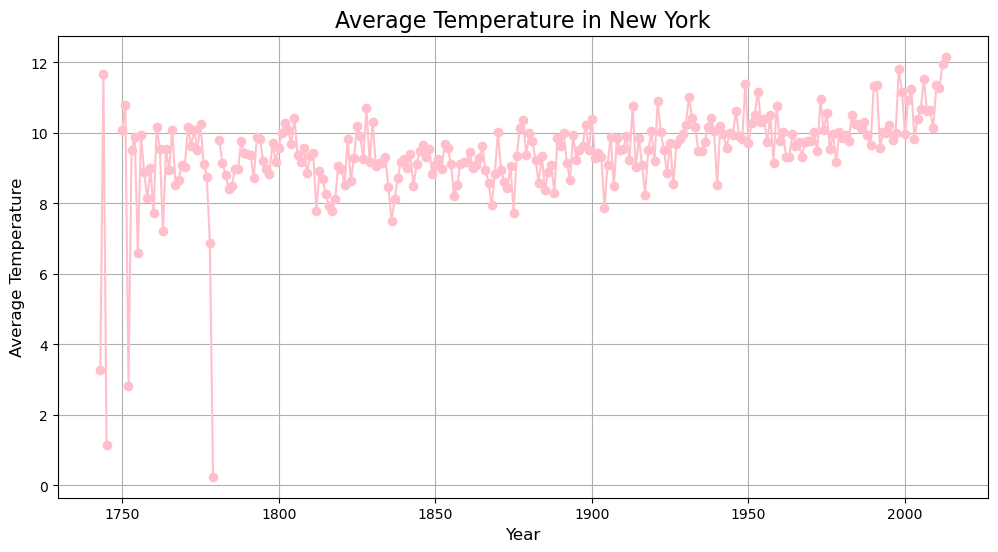

In [13]:
city_data = data[data['City'] == 'New York'].copy()
city_data['dt']=pd.to_datetime(city_data['dt'],errors='coerce')

city_data['Year']=city_data['dt'].dt.year
annual_avg_temp=city_data.groupby('Year')['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(annual_avg_temp['Year'],annual_avg_temp['AverageTemperature'],linestyle='-',color='pink',marker='o')
plt.title('Average Temperature in New York',fontsize=16)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Temperature',fontsize=12)
plt.grid(True)
plt.show()

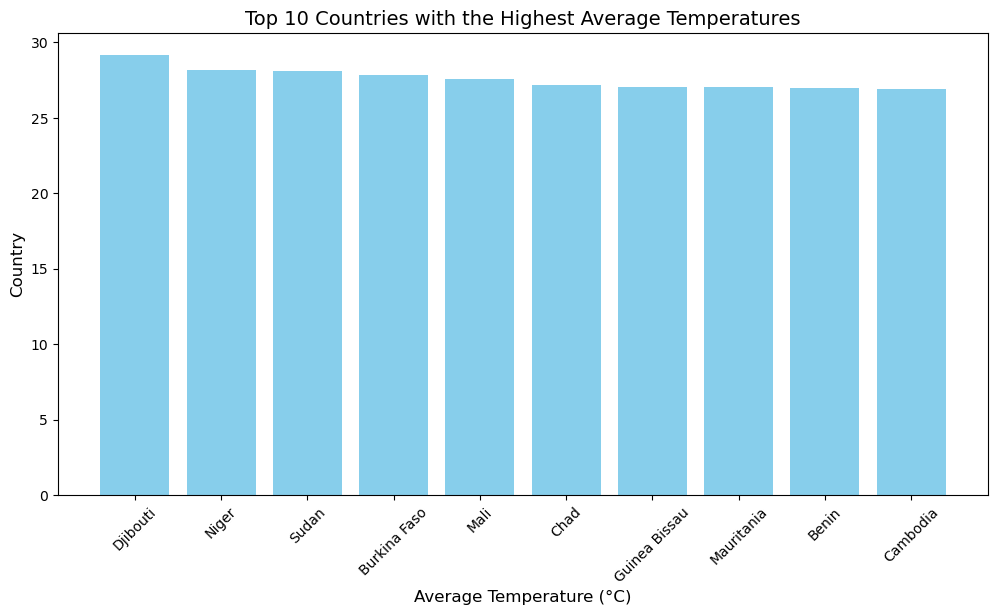

In [24]:
country_avg_temp = data.groupby('Country')['AverageTemperature'].mean().reset_index()
country_avg_temp=country_avg_temp.dropna()
country_avg_temp_sorted = country_avg_temp.sort_values(by='AverageTemperature', ascending=False)
top_10_countries = country_avg_temp_sorted.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Country'], top_10_countries['AverageTemperature'], color='skyblue')
plt.xlabel('Average Temperature (°C)', fontsize=12)  
plt.ylabel('Country', fontsize=12)
plt.title('Top 10 Countries with the Highest Average Temperatures', fontsize=14)
plt.xticks(rotation=45) 
plt.show()

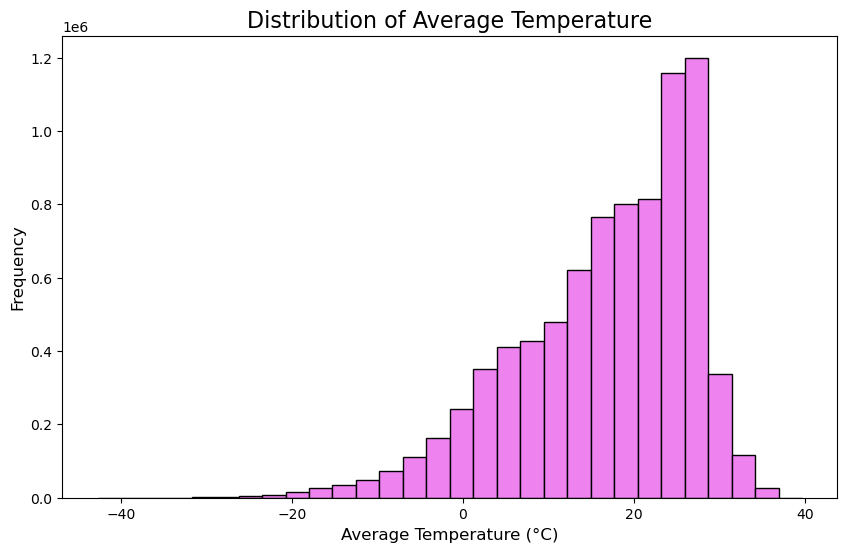

In [30]:
data_clean = data.dropna(subset=['AverageTemperature'])

plt.figure(figsize=(10, 6))
plt.hist(data_clean['AverageTemperature'], bins=30, color='violet', edgecolor='black')

plt.title('Distribution of Average Temperature', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

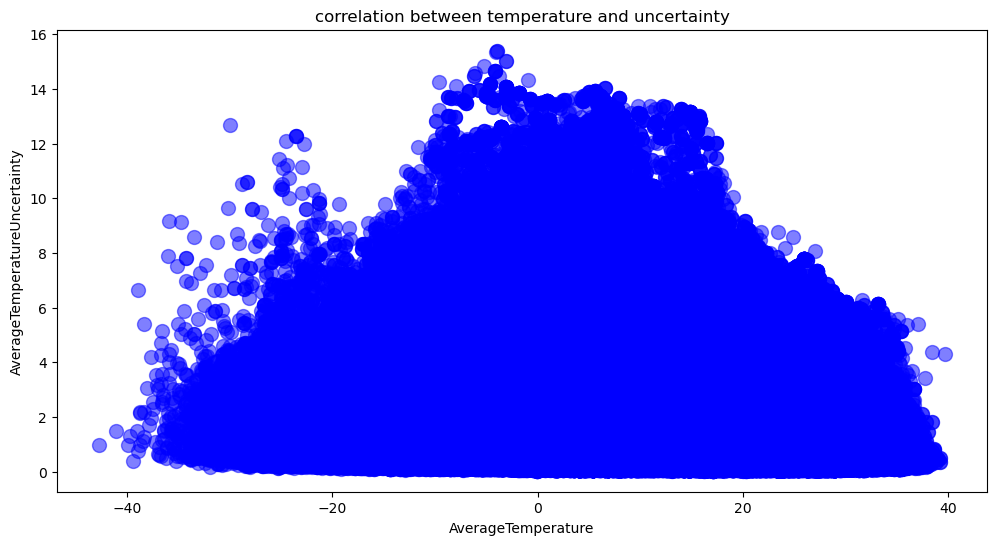

In [40]:
data_clean = data.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
plt.figure(figsize=(12,6))
plt.scatter(data_clean['AverageTemperature'],data_clean['AverageTemperatureUncertainty'],color='blue',s=100,alpha=0.5)
plt.title("correlation between temperature and uncertainty")
plt.xlabel("AverageTemperature")
plt.ylabel("AverageTemperatureUncertainty")
plt.show()

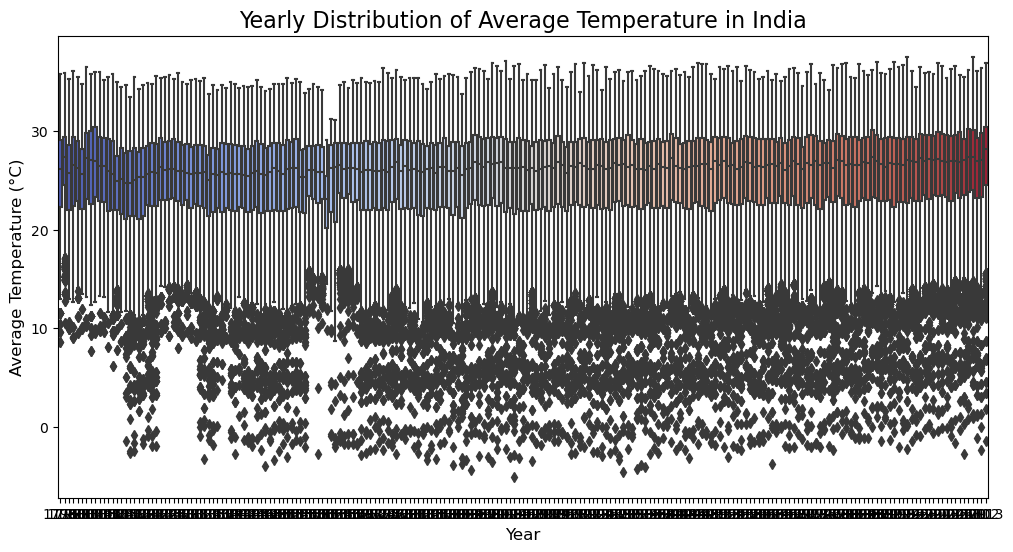

In [48]:
country_data = data[data['Country'] == 'India'].copy()
country_data['dt'] = pd.to_datetime(country_data['dt'], errors='coerce') 
country_data = country_data.dropna(subset=['dt'])  
country_data['Year'] = country_data['dt'].dt.year
country_data = country_data[['Year', 'AverageTemperature']].dropna()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='AverageTemperature', data=country_data, palette='coolwarm')
plt.title("Yearly Distribution of Average Temperature in India", fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.show()

In [49]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [53]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


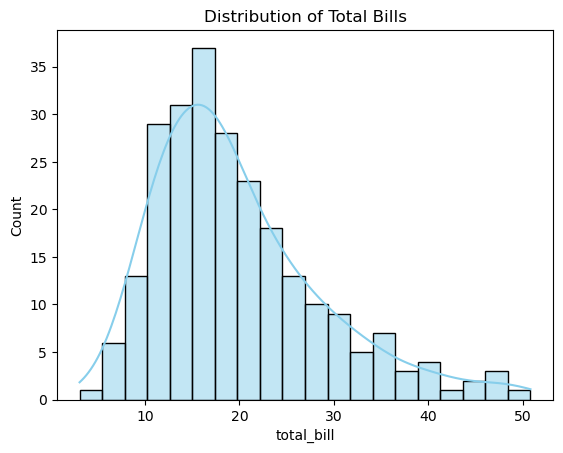

In [57]:
sns.histplot(data=tips,x="total_bill",kde=True,bins=20,color="skyblue")
plt.title("Distribution of Total Bills")
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_12436\2452466825.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tips,x="total_bill",shade=True,color='purple')


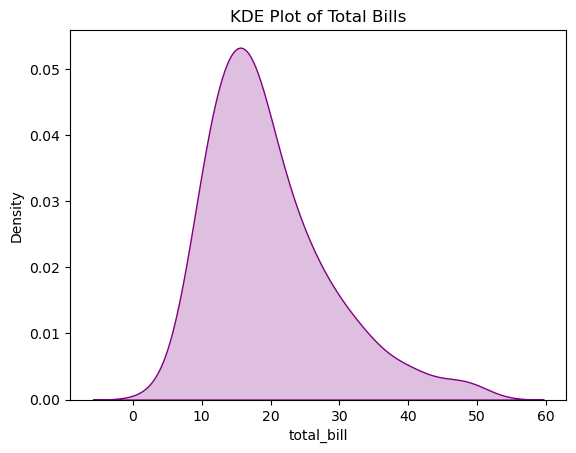

In [59]:
sns.kdeplot(data=tips,x="total_bill",shade=True,color='purple')
plt.title("KDE Plot of Total Bills")
plt.show()

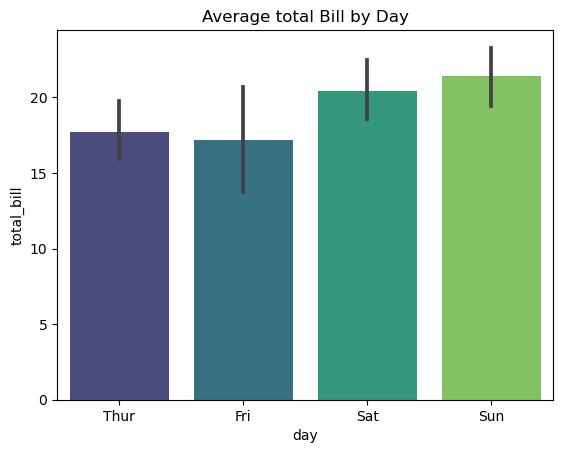

In [62]:
sns.barplot(data=tips,x='day',y='total_bill',palette='viridis')
plt.title('Average total Bill by Day')
plt.show()

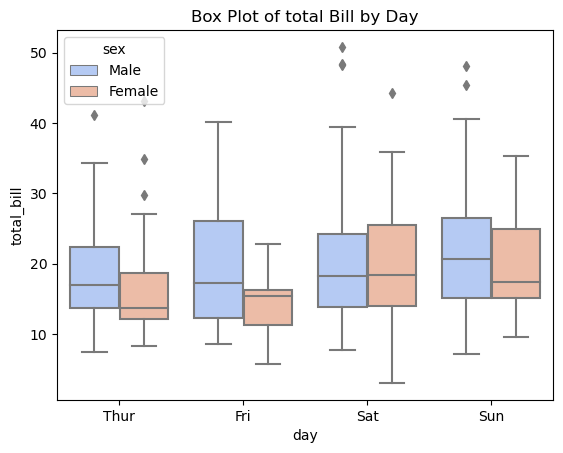

In [63]:
sns.boxplot(data=tips,x='day',y='total_bill',hue='sex',palette='coolwarm')
plt.title('Box Plot of total Bill by Day')
plt.show()

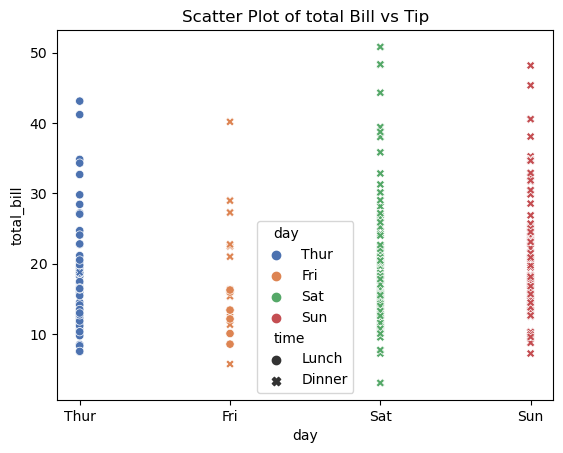

In [65]:
sns.scatterplot(data=tips,x='day',y='total_bill',hue='day',palette='deep',style='time')
plt.title('Scatter Plot of total Bill vs Tip')
plt.show()

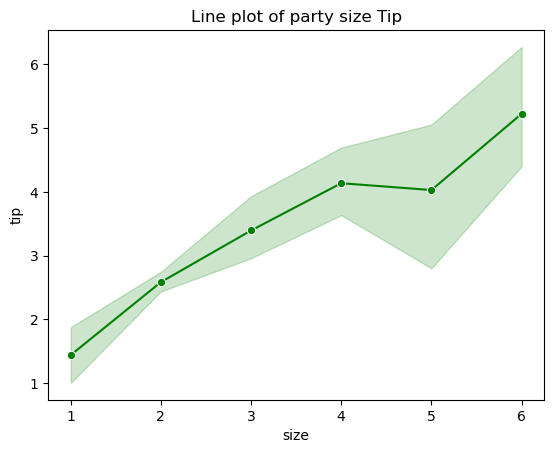

In [67]:
sns.lineplot(data=tips,x='size',y='tip',marker='o',color='green')
plt.title('Line plot of party size Tip')
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


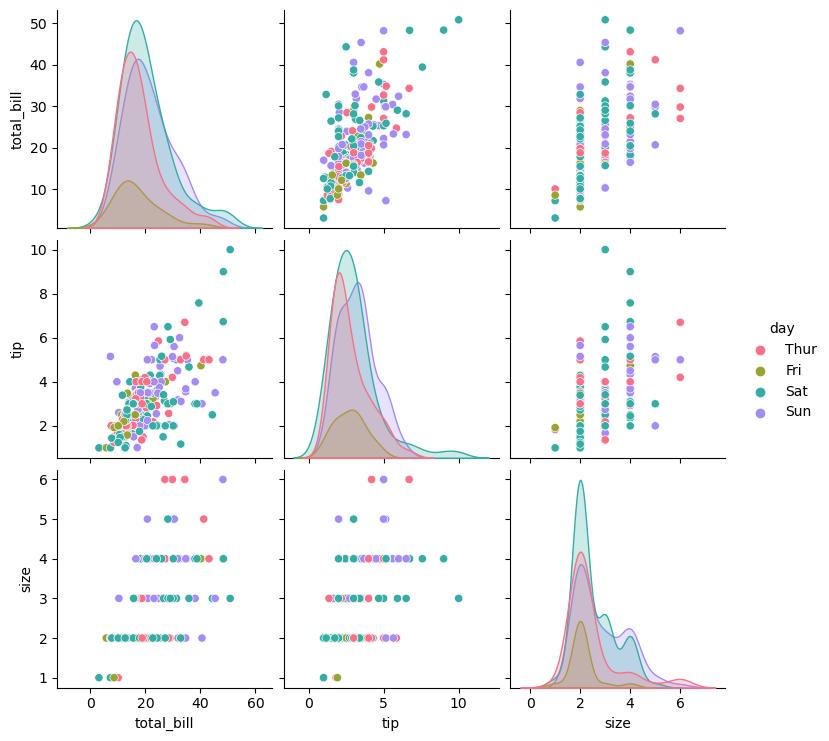

In [68]:
sns.pairplot(data=tips,hue='day',palette='husl')
plt.show()

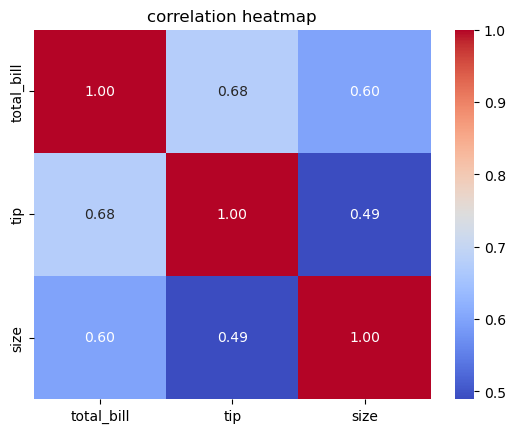

In [71]:
numeric_data = tips.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt='.2f')
plt.title("correlation heatmap")
plt.show()